In [1]:
#Install them before running the code
!pip install --upgrade pip
# !pip --upgrade install setuptools
!pip install numpy==1.26.4
!pip install --force-reinstall gensim
!pip install tensorflow==2.18.1
#Restart the session

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 82.5 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
   ━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 35.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
# Load your data (update path as needed)
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset/cleaned_balanced_50/Balanced_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df.shape

(50922, 15)

In [37]:
df.columns

Index(['id', 'sourceIdentifier', 'published', 'lastModified', 'vulnStatus',
       'description', 'baseSeverity', 'baseScore', 'attackVector',
       'confidentialityImpact', 'integrityImpact', 'availabilityImpact',
       'exploitabilityScore', 'impactScore', 'label'],
      dtype='object')

In [38]:
# Basic Data Exploration and Preprocessing
print(f"DataFrame shape: {df.shape}")
print(df.dtypes)
print(df.describe())
print("Missing values per column:")
print(df.isnull().sum())


DataFrame shape: (50922, 15)
id                        object
sourceIdentifier          object
published                 object
lastModified              object
vulnStatus                object
description               object
baseSeverity              object
baseScore                float64
attackVector              object
confidentialityImpact     object
integrityImpact           object
availabilityImpact        object
exploitabilityScore      float64
impactScore              float64
label                      int64
dtype: object
          baseScore  exploitabilityScore   impactScore         label
count  31443.000000         31443.000000  31443.000000  50922.000000
mean       7.123519             2.650116      4.319356      0.500000
std        1.719826             0.951637      1.547574      0.500005
min        0.000000             0.100000      0.000000      0.000000
25%        5.700000             1.800000      3.400000      0.000000
50%        7.500000             2.800000      3.

In [39]:
df['label'].isnull().sum()

0

In [ ]:
# Label distribution and correlation (if needed)
print("Label distribution (exploited = 1):")
print(df['label'].value_counts(normalize=True))

Label distribution (exploited = 1):
label
1    0.5
0    0.5
Name: proportion, dtype: float64


/tmp/ipython-input-41-883251108.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='label', y='percentage', data=label_dist, palette='viridis')


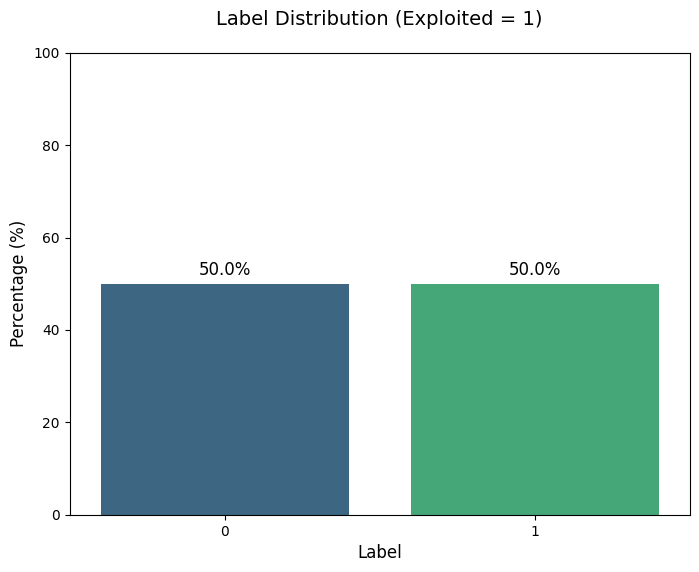

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate normalized percentages and format
label_dist = (df['label'].value_counts(normalize=True)
                          .sort_index()
                          .mul(100)
                          .round(2)
                          .rename_axis('label')
                          .reset_index(name='percentage'))

# Create bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='label', y='percentage', data=label_dist, palette='viridis')

# Add title and labels
plt.title('Label Distribution (Exploited = 1)', fontsize=14, pad=20)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.ylim(0, 100)  # Ensure full percentage range

# Annotate bars with percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12)

plt.show()

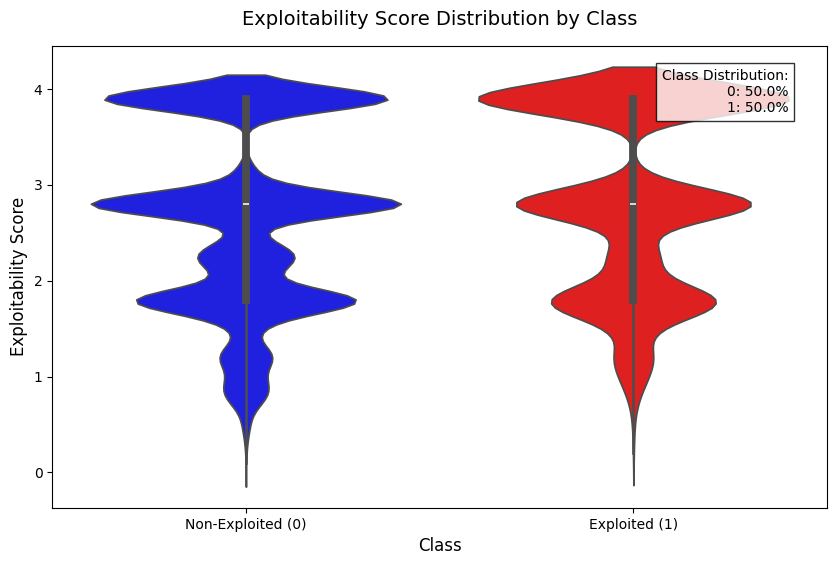

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(
    x='label',
    y='exploitabilityScore',
    hue='label',
    data=df,
    palette={0: 'blue', 1: 'red'},
    legend=False
)
plt.title('Exploitability Score Distribution by Class', fontsize=14, pad=15)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Exploitability Score', fontsize=12)
plt.xticks([0, 1], ['Non-Exploited (0)', 'Exploited (1)'])

# Add class distribution annotation
class_dist = df['label'].value_counts(normalize=True).sort_index()
plt.text(0.95, 0.95,
         f"Class Distribution:\n0: {class_dist[0]*100:.1f}%\n1: {class_dist[1]*100:.1f}%",
         transform=plt.gca().transAxes,
         ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

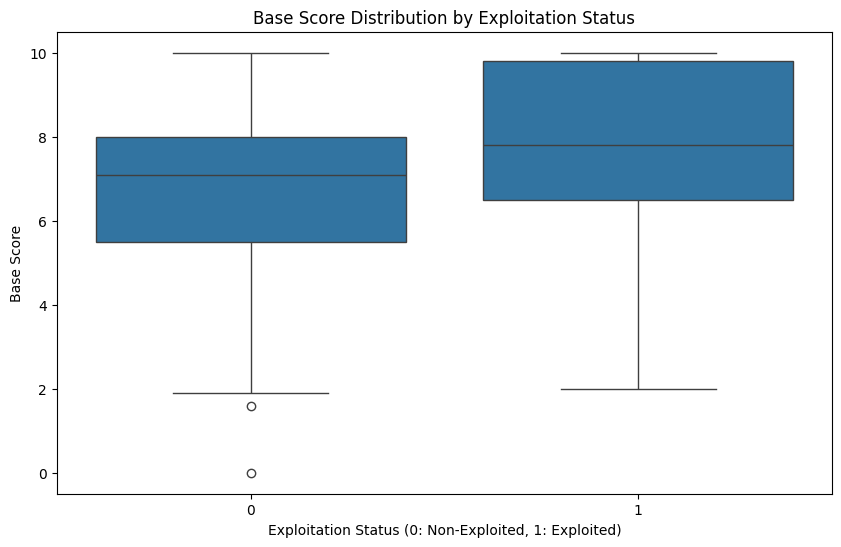

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='baseScore')  # Or sns.violinplot(...)
plt.title('Base Score Distribution by Exploitation Status')
plt.xlabel('Exploitation Status (0: Non-Exploited, 1: Exploited)')
plt.ylabel('Base Score')
plt.show()

In [44]:
# Data Cleaning: Filter out unwanted descriptions and drop less useful columns
df = df[~df['description'].str.lower().str.contains('do not use|rejected|withdrawn')]
df = df.drop(columns=['sourceIdentifier', 'published', 'lastModified'])
df['description'] = df['description'].str.lower().str.strip()

In [45]:
# Handle missing CVSS data without dropping records
cat_cols = [
    'baseSeverity', 'attackVector'
]
for col in cat_cols:
    df[col] = df[col].fillna('UNKNOWN')

num_cols = []
for col in num_cols:
    df[col] = df[col].fillna(-1)

In [46]:
# Add missing value flags
for col in num_cols + cat_cols:
    df[f"{col}_missing"] = df[col].apply(lambda x: 1 if x == -1 or x == 'UNKNOWN' else 0)

In [47]:
df.isnull().sum()

,0
id,0
vulnStatus,0
description,0
baseSeverity,0
baseScore,19353
attackVector,0
confidentialityImpact,19353
integrityImpact,19353
availabilityImpact,19353
exploitabilityScore,19353


In [48]:
# -----------------------------
# Text Representations: FastText and TF-IDF
# -----------------------------
from gensim.models import FastText
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import FastText

# Prepare tokenized sentences for FastText
sentences = df['description'].apply(lambda x: word_tokenize(x)).tolist()
ft_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4, epochs=10)

def description_to_vec(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df['tokens'] = df['description'].apply(word_tokenize)
fasttext_vectors = np.vstack(df['tokens'].apply(lambda x: description_to_vec(x, ft_model)).values)

In [49]:
# TF-IDF representation (using descriptions directly)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Reduce dimensionality of TF-IDF features
svd = TruncatedSVD(n_components=50, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

In [50]:
# -----------------------------
# Categorical and Numeric Features
# -----------------------------
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
cat_encoded = encoder.fit_transform(df[cat_cols])

miss_cols = [col for col in df.columns if col.endswith('_missing')]
num_data = df[num_cols + miss_cols].values

# Concatenate all features: FastText (100-dim), TF-IDF reduced (50-dim), categorical, and numeric features.
X = np.hstack([fasttext_vectors, tfidf_reduced, cat_encoded])
y = df['label'].values

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (50771, 161)
Label vector shape: (50771,)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

None


In [19]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from collections import Counter


# print("Before SMOTE:", Counter(y))

# # Split before applying SMOTE (important!)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# # Apply SMOTE only to training data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# print("After SMOTE:", Counter(y_resampled))


In [21]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate normalized percentages and format
# label_dist = (pd.Series(y_resampled).value_counts(normalize=True)
#                           .sort_index()
#                           .mul(100)
#                           .round(2)
#                           .rename_axis('label')
#                           .reset_index(name='percentage'))

# # Create bar plot
# plt.figure(figsize=(8, 6))
# ax = sns.barplot(x='label', y='percentage', data=label_dist, palette='viridis')

# # Add title and labels
# plt.title('Label Distribution (Exploited = 1)', fontsize=14, pad=20)
# plt.xlabel('Label', fontsize=12)
# plt.ylabel('Percentage (%)', fontsize=12)
# plt.ylim(0, 100)  # Ensure full percentage range

# # Annotate bars with percentages
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}%',
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center',
#                 xytext=(0, 10),
#                 textcoords='offset points',
#                 fontsize=12)

# plt.show()

In [59]:
# -----------------------------
# Define Custom Focal Loss Function
# -----------------------------
# Step 4: Define Focal Loss
from tensorflow.keras import backend as K
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma) * y_true + (1 - alpha) * K.pow(y_pred, gamma) * (1 - y_true)
        loss = weight * cross_entropy
        return K.mean(loss)
    return focal_loss_fixed


In [60]:
#-----------------------------
# Build the Model with Improved Architecture
# -----------------------------
# Step 5: Define the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import tensorflow as tf # Make sure tf is also imported

def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='swish', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='swish'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='swish'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation='swish'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss=focal_loss(gamma=2, alpha=0.25),
                  metrics=['accuracy', tf.keras.metrics.AUC()])
    return model

In [61]:
# -----------------------------
# Set Up Callbacks for Training
# -----------------------------
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Optional: Use class weights if still needed to handle imbalance
class_weights = {0: 0.549, 1: 5.694}

In [62]:
# -----------------------------
# Train the Model
# -----------------------------
input_dim = X_train.shape[1] # Get the number of features from the training data
model = build_model(input_dim)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=8,
    #class_weight=class_weights,
    callbacks=[reduce_lr],
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4443/4443 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.7875 - auc_1: 0.8480 - loss: 0.0591 - val_accuracy: 0.8854 - val_auc_1: 0.9480 - val_loss: 0.0268 - learning_rate: 0.0010
Epoch 2/30
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8578 - auc_1: 0.9150 - loss: 0.0358 - val_accuracy: 0.8838 - val_auc_1: 0.9500 - val_loss: 0.0259 - learning_rate: 0.0010
Epoch 3/30
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.8611 - auc_1: 0.9193 - loss: 0.0347 - val_accuracy: 0.8831 - val_auc_1: 0.9521 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 4/30
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.8669 - auc_1: 0.9237 - loss: 0.0331 - val_accuracy: 0.8829 - val_auc_1: 0.9505 - val_loss: 0.0259 - learning_rate: 0.0010
Epoch 5/30
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.8661 - auc_1: 0.9270 - loss: 0.0328 - val_accuracy: 0.8834 - val_auc_1: 0.9536 - val_loss: 0.0246 - learning_rate: 0.0010
Epoch 6/30
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step -

In [63]:
# -----------------------------
# Evaluate the Model
# -----------------------------
loss, accuracy, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test AUC: {auc:.4f}")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy_sc = accuracy_score(y_test, y_pred)
precision_sc = precision_score(y_test, y_pred)
recall_sc = recall_score(y_test, y_pred)
f1_sc = f1_score(y_test, y_pred)
roc_auc_sc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy_sc:.2f}")
print(f"Precision: {precision_sc:.2f}")
print(f"Recall: {recall_sc:.2f}")
print(f"F1 Score: {f1_sc:.2f}")
print(f"ROC-AUC Score: {roc_auc_sc:.2f}")

Test Loss: 0.0234
Test Accuracy: 0.8902
Test AUC: 0.9587
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.89
Precision: 0.99
Recall: 0.78
F1 Score: 0.88
ROC-AUC Score: 0.96


<Figure size 600x600 with 0 Axes>

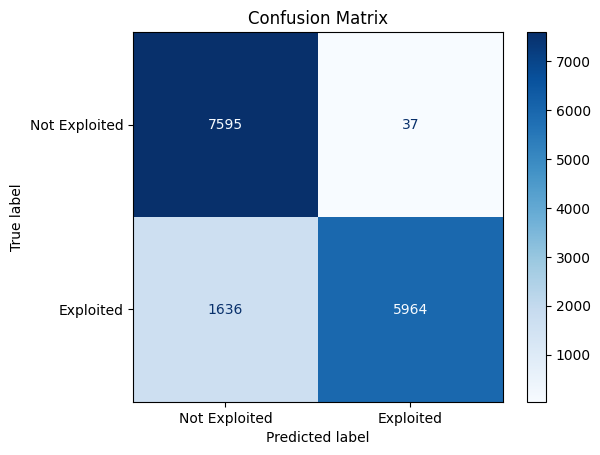

In [64]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Exploited", "Exploited"])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,773 (378.02 KB)

 Trainable params: 32,097 (125.38 KB)

 Non-trainable params: 480 (1.88 KB)

 Optimizer params: 64,196 (250.77 KB)

In [66]:
model.save('finally_model.h5')

In [18]:
# Step 2: Mount and Load processed data
from google.colab import drive
drive.mount('/content/drive')

X = np.save('/content/drive/MyDrive/dataSaved/X.npy',X)
y = np.save('/content/drive/MyDrive/dataSaved/y.npy',y)
X_test = np.save('/content/drive/MyDrive/dataSaved/X_test.npy',X_test)
y_test = np.save('/content/drive/MyDrive/dataSaved/y_test.npy',y_test)
X_train = np.save('/content/drive/MyDrive/dataSaved/X_train.npy',X_train)
y_train = np.save('/content/drive/MyDrive/dataSaved/y_train.npy',y_train)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

In [ ]:
# prompt: ft_model = FastText.load("ft_model.bin")
# tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
# svd = joblib.load("svd.pkl")
# encoder = joblib.load("onehot_encoder.pkl")
# config = joblib.load("preprocessing_config.json")
# i want to make this files

import joblib
import json

# Assuming ft_model, tfidf_vectorizer, svd, and encoder are already defined and trained

# Save FastText model
ft_model.save("ft_model.bin")

# Save TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

# Save SVD model
joblib.dump(svd, "svd.pkl")

# Save OneHotEncoder (assuming 'encoder' is your OneHotEncoder object)
joblib.dump(encoder, "onehot_encoder.pkl")


# Example preprocessing configuration (replace with your actual configuration)
preprocessing_config = {
    "max_features": 1000,
    "stop_words": "english",
    "svd_components": 50,
    # Add other relevant configuration parameters
}

# Save preprocessing config as JSON
with open("preprocessing_config.json", "w") as f:
    json.dump(preprocessing_config, f)


In [ ]:
!pip install flask

In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import pandas as pd
import tensorflow as tf
from gensim.models import FastText
import joblib
from nltk.tokenize import word_tokenize

app = Flask(__name__)

# Load artifacts
model = tf.keras.models.load_model('model.h5', custom_objects={'focal_loss_fixed': focal_loss(gamma=2., alpha=0.25)})
ft_model = FastText.load("ft_model.bin")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
svd = joblib.load("svd.pkl")
encoder = joblib.load("onehot_encoder.pkl")
config = joblib.load("preprocessing_config.json")

def preprocess_input(data):
    # Tokenize description
    tokens = word_tokenize(data['description'].lower())

    # FastText vector
    vec = description_to_vec(tokens, ft_model).reshape(1, -1)

    # TF-IDF + SVD
    tfidf = tfidf_vectorizer.transform([data['description']])
    tfidf_reduced = svd.transform(tfidf)

    # Categorical encoding
    cat_data = [[data[col] for col in config['cat_cols']]]
    cat_encoded = encoder.transform(cat_data)

    # Numeric + missing flags
    num_data = [data[col] for col in config['num_cols'] + config['miss_cols']]
    num_array = np.array(num_data).reshape(1, -1)

    # Combine all features
    return np.hstack([vec, tfidf_reduced, cat_encoded, num_array])

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        processed_data = preprocess_input(data)
        prediction = model.predict(processed_data)[0][0]
        return jsonify({"prediction": float(prediction), "exploited": bool(prediction > 0.5)})
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=False)